In [22]:
import os
from os.path import join as oj
import sys, time
sys.path.insert(1, oj(sys.path[0], '..'))  # insert parent path
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pmlb
from tqdm import tqdm
from copy import deepcopy
import pickle as pkl
import pandas as pd
import data
import numpy.linalg as npl 
import numpy.random as npr
from scipy.optimize import minimize
from scipy.stats import ortho_group

import pickle
%matplotlib inline
%load_ext autoreload
%autoreload 2

from sklearn.linear_model import RidgeCV, LinearRegression

save_dir = 'results'
os.makedirs(save_dir, exist_ok=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Ridge

## Plot Results from files

In [23]:
file = open('ridge_identity_bias_variance.txt', 'rb')
results_identity = pickle.load(file)
file.close()

file = open('ridge_singular_bias_variance.txt', 'rb')
results_singular = pickle.load(file)
file.close()

In [3]:
import matplotlib as mpl
label_size = 20
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
mpl.rcParams['axes.labelsize'] = label_size
mpl.rcParams['axes.titlesize'] = label_size
mpl.rcParams['figure.titlesize'] = label_size
# mpl.rcParams['lines.markersize'] = 8
mpl.rcParams['grid.linewidth'] = 2.5
mpl.rcParams['legend.fontsize'] = 20
# pylab.rcParams['xtick.major.pad']=5
# pylab.rcParams['ytick.major.pad']=5

In [12]:
results_identity["ds"]

[400]

In [6]:
results_identity.keys()

dict_keys(['ns', 'ds', 'gammas', 'num_trials', 'beta_norm', 'mse_test', 't_pred_variance', 't_pred_bias', 'ols_test', 'ols_pred_variance', 'ols_pred_bias', 'mse', 't_variance', 't_bias', 'ols_mse', 'ols_variance', 'ols_bias'])

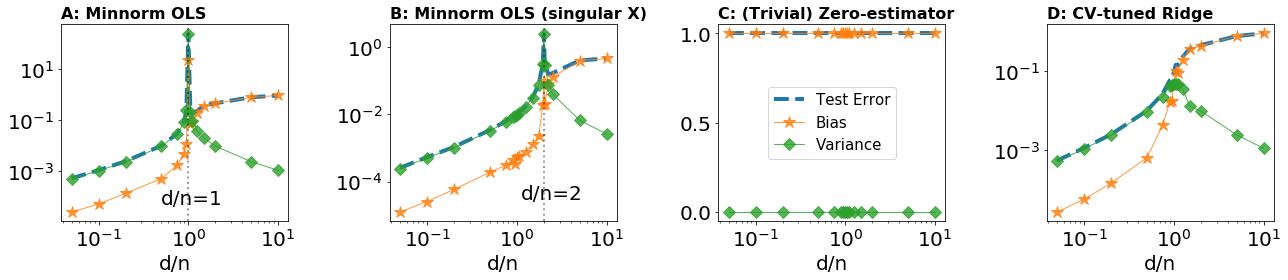

In [11]:
plt.figure(figsize=[18, 4])
for j, d in enumerate(results_identity['ds']):
    plt.subplot(1, 4, 4)
    plt.title('D: CV-tuned Ridge', fontweight='bold', loc='left', fontsize=16)
    plt.loglog(results_identity["gammas"], results_identity["mse_test"].mean(0)[j, :], label='Test Error', linestyle='--', linewidth=4.)
    plt.loglog(results_identity["gammas"], results_identity["t_pred_bias"][j, :], label='Bias', linestyle='-', linewidth=1, marker='*', markersize=12, alpha=.8)
    plt.loglog(results_identity["gammas"], results_identity["t_pred_variance"][j, :], label='Variance', linestyle='-', linewidth=1, marker='D', markersize=8, alpha=.8)
    
#     plt.title("Ridge-CV (Identity)", fontsize=20)
    plt.xlabel('d/n')
    
    plt.subplot(1, 4, 1)
    plt.title('A: Minnorm OLS', fontweight='bold', loc='left', fontsize=16)
    plt.loglog(results_identity["gammas"], results_identity["ols_test"].mean(0)[j, :], label='Test Error', linestyle='--', linewidth=4.)
    plt.loglog(results_identity["gammas"], results_identity["ols_pred_bias"][j, :], label='Bias', linestyle='-', linewidth=1, marker='*', markersize=12, alpha=.8)
    plt.loglog(results_identity["gammas"], results_identity["ols_pred_variance"][j, :], label='Variance', linestyle='-', linewidth=1, marker='D', markersize=8, alpha=.8)
    plt.axvline(1., color='k', linestyle=':', linewidth=2., alpha=0.4)
    
    plt.text(.5, 0.5e-4, s='d/n=1', fontsize=20)
#     plt.title("Min. Norm OLS", fontsize=20)
    plt.xlabel('d/n')
#     plt.legend()

    plt.subplot(1, 4, 3)
    plt.title('C: (Trivial) Zero-estimator', fontweight='bold', loc='left', fontsize=16)
    plt.semilogx(results_identity["gammas"], results_identity["beta_norm"]*np.ones_like(results_identity["gammas"]), label='Test Error', linestyle='--', linewidth=4.)
    plt.semilogx(results_identity["gammas"], results_identity["beta_norm"]*np.ones_like(results_identity["gammas"]), label='Bias', linestyle='-', linewidth=1, marker='*', markersize=12, alpha=.8)
    plt.semilogx(results_identity["gammas"], np.zeros_like(results_identity["gammas"]), label='Variance', linestyle='-', linewidth=1, marker='D', markersize=8, alpha=.8)
    
#     plt.title("The Zero-estimator",  fontsize=20)
    plt.legend(loc="center", fontsize=15)
    plt.xlabel('d/n')
#     plt.legend()
    
    plt.subplot(1, 4, 2)
    plt.title('B: Minnorm OLS (singular X)', fontweight='bold', loc='left', fontsize=16)
    plt.loglog(results_singular["gammas"], results_singular["ols_test"].mean(0)[j, :], label='Test Error', linestyle='--', linewidth=4.)
    plt.loglog(results_singular["gammas"], results_singular["ols_pred_bias"][j, :], label='Bias', linestyle='-', linewidth=1, marker='*', markersize=12, alpha=.8)
    plt.loglog(results_singular["gammas"], results_singular["ols_pred_variance"][j, :], label='Variance', linestyle='-', linewidth=1, marker='D', markersize=8, alpha=.8)
    plt.axvline(2., color='k', linestyle=':', linewidth=2., alpha=0.4)
    plt.text(1.1, 3e-5, s='d/n=2', fontsize=20)
    plt.xlabel('d/n')    

plt.tight_layout()
plt.savefig('all_bias_variance.pdf')
plt.show()


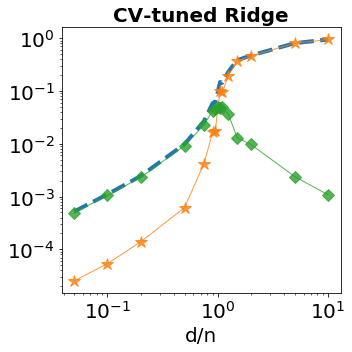

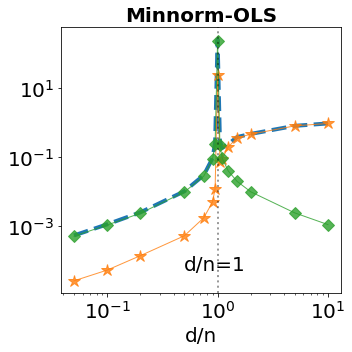

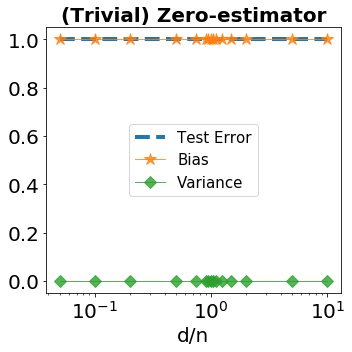

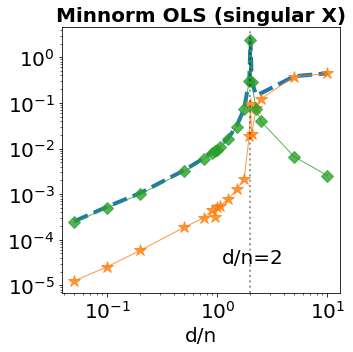

In [20]:

for j, d in enumerate(results_identity['ds']):

    plt.figure(figsize=[5, 5])
    plt.title('CV-tuned Ridge', fontweight='bold', fontsize=20)
    plt.loglog(results_identity["gammas"], results_identity["mse_test"].mean(0)[j, :], label='Test Error', linestyle='--', linewidth=4.)
    plt.loglog(results_identity["gammas"], results_identity["t_pred_bias"][j, :], label='Bias', linestyle='-', linewidth=1, marker='*', markersize=12, alpha=.8)
    plt.loglog(results_identity["gammas"], results_identity["t_pred_variance"][j, :], label='Variance', linestyle='-', linewidth=1, marker='D', markersize=8, alpha=.8)
    plt.xlabel('d/n')
    plt.tight_layout()
    plt.savefig('cv_ridge.pdf')
    plt.show()

    plt.figure(figsize=[5, 5])
    plt.title('Minnorm-OLS', fontweight='bold', fontsize=20)
    plt.loglog(results_identity["gammas"], results_identity["ols_test"].mean(0)[j, :], label='Test Error', linestyle='--', linewidth=4.)
    plt.loglog(results_identity["gammas"], results_identity["ols_pred_bias"][j, :], label='Bias', linestyle='-', linewidth=1, marker='*', markersize=12, alpha=.8)
    plt.loglog(results_identity["gammas"], results_identity["ols_pred_variance"][j, :], label='Variance', linestyle='-', linewidth=1, marker='D', markersize=8, alpha=.8)
    plt.axvline(1., color='k', linestyle=':', linewidth=2., alpha=0.4)
    plt.text(.5, 0.5e-4, s='d/n=1', fontsize=20)
    plt.xlabel('d/n')
    plt.tight_layout()
    plt.savefig('ols.pdf')
    plt.show()

    plt.figure(figsize=[5, 5])
    plt.title('(Trivial) Zero-estimator', fontweight='bold', fontsize=20)
    plt.semilogx(results_identity["gammas"], results_identity["beta_norm"]*np.ones_like(results_identity["gammas"]), label='Test Error', linestyle='--', linewidth=4.)
    plt.semilogx(results_identity["gammas"], results_identity["beta_norm"]*np.ones_like(results_identity["gammas"]), label='Bias', linestyle='-', linewidth=1, marker='*', markersize=12, alpha=.8)
    plt.semilogx(results_identity["gammas"], np.zeros_like(results_identity["gammas"]), label='Variance', linestyle='-', linewidth=1, marker='D', markersize=8, alpha=.8)    
    plt.legend(loc="center", fontsize=15)
    plt.xlabel('d/n')
    plt.tight_layout()
    plt.savefig('zero.pdf')
    plt.show()
    
    plt.figure(figsize=[5, 5])
    plt.title('Minnorm OLS (singular X)', fontweight='bold', fontsize=20)

    plt.loglog(results_singular["gammas"], results_singular["ols_test"].mean(0)[j, :], label='Test Error', linestyle='--', linewidth=4.)
    plt.loglog(results_singular["gammas"], results_singular["ols_pred_bias"][j, :], label='Bias', linestyle='-', linewidth=1, marker='*', markersize=12, alpha=.8)
    plt.loglog(results_singular["gammas"], results_singular["ols_pred_variance"][j, :], label='Variance', linestyle='-', linewidth=1, marker='D', markersize=8, alpha=.8)
    plt.axvline(2., color='k', linestyle=':', linewidth=2., alpha=0.4)
    plt.text(1.1, 3e-5, s='d/n=2', fontsize=20)
    plt.xlabel('d/n')    
    plt.tight_layout()
    plt.savefig('ols_singular.pdf')
    plt.show()


array([ 0.05,  0.1 ,  0.2 ,  0.5 ,  0.75,  0.9 ,  0.95,  1.  ,  1.05,
        1.1 ,  1.25,  1.5 ,  2.  ,  5.  , 10.  ])

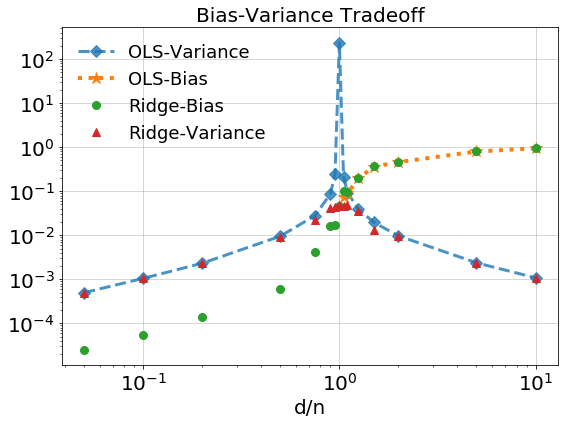

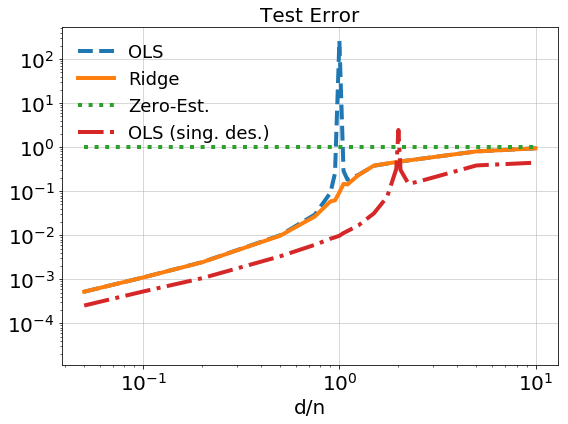

In [74]:

idx = results_identity["gammas"]>1
idx2 = results_identity["gammas"]
for j, d in enumerate(results_identity['ds']):
    plt.figure(figsize=[8, 6])
    plt.loglog(results_identity["gammas"], results_identity["ols_pred_variance"][j, :], label='OLS-Variance', linestyle='--', linewidth=3., marker='D', markersize=8, 
               alpha=.8)
    plt.loglog(results_identity["gammas"][idx], results_identity["ols_pred_bias"][j, idx], label='OLS-Bias', linestyle=':', 
               linewidth=4., marker='*', markersize=12, alpha=1.)

    plt.loglog(results_identity["gammas"], results_identity["t_pred_bias"][j, :], label='Ridge-Bias', linestyle='None', linewidth=1., marker='o', markersize=8, alpha=1.)
    plt.loglog(results_identity["gammas"], results_identity["t_pred_variance"][j, :], label='Ridge-Variance', 
               linestyle='None', linewidth=1., marker='^', markersize=8, 
               alpha=1)

    plt.xlabel('d/n')
    plt.title('Bias-Variance Tradeoff')
    plt.legend(frameon=False, fontsize=18, loc='upper left')
    plt.grid(True, alpha=0.5, linewidth=1.)
    plt.tight_layout()
    ylims = plt.gca().get_ylim()
    plt.savefig('bias_variance_ridge_ols.pdf')
    plt.show()
    plt.figure(figsize=[8, 6])
#     plt.title('CV-tuned Ridge', fontweight='bold', fontsize=20)
    plt.loglog(results_identity["gammas"], results_identity["ols_test"].mean(0)[j, :], label='OLS', linestyle='--', linewidth=4.)
    plt.loglog(results_identity["gammas"], results_identity["mse_test"].mean(0)[j, :], label='Ridge', linestyle='-', linewidth=4.)
    plt.loglog(results_identity["gammas"], results_identity["beta_norm"]*np.ones_like(results_identity["gammas"]), label='Zero-Est.', linestyle=':', linewidth=4.)
    plt.loglog(results_singular["gammas"], results_singular["ols_test"].mean(0)[j, :], label='OLS (sing. des.)', linestyle='-.', linewidth=4.)
    plt.xlabel('d/n')
    plt.title('Test Error')
    plt.legend(frameon=False, fontsize=18, loc='upper left')
    plt.ylim(ylims)
    plt.grid(True, alpha=0.5, linewidth=1.)
    plt.tight_layout()
    plt.savefig('test_error_4_estimators.pdf')
    plt.show()
    
    

## Run to get results

In [ ]:

npr.seed(0)
num_trials = 20
# gammas = np.array([5e-2, 1e-1, 0.2, 0.5, 0.75, 0.9, 0.95, 1.,  1.05,  1.1,  1.25, 1.5, 2., 5., 10.])
gammas = np.array([5e-2, 1e-1, 0.2, 0.5, 0.75, 0.9, 0.95, 1.,  1.05,  1.25, 1.5,  1.75, 1.95, 2., 2.05, 2.25, 2.5, 5., 10.])

noise_std = .1
n_test = 5000

ds = [400]
ns = np.asarray(ds[0]/gammas, dtype=int)

ols_train = np.zeros((num_trials, len(ds), len(ns)))
ols_test = np.zeros((num_trials, len(ds), len(ns)))
ols_mse_beta = np.zeros((num_trials, len(ds), len(ns)))
ols_bias = np.zeros((len(ds), len(ns)))
ols_variance = np.zeros((len(ds), len(ns))) 
ols_pred_bias = np.zeros((len(ds), len(ns)))
ols_pred_variance = np.zeros((len(ds), len(ns)))


mse_train = np.zeros((num_trials, len(ds), len(ns)))
mse_test = np.zeros((num_trials, len(ds), len(ns)))
mse_beta = np.zeros((num_trials, len(ds), len(ns)))
t_bias  = np.zeros((len(ds), len(ns)))
t_variance = np.zeros((len(ds), len(ns)))
t_pred_bias = np.zeros((len(ds), len(ns)))
t_pred_variance = np.zeros((len(ds), len(ns)))


## choice of singular or not, just change this prefix
prefix = 'ridge_identity_sigma_%d_'%noise_std
# prefix = 'ridge_singular_sigma_%d_'%noise_std ##

for j, d in enumerate(ds):
    ns = np.asarray(np.maximum(2, d/gammas), dtype=int)

    for k, n in enumerate(ns):
        tvars = np.zeros((num_trials, d))
        ols_vars = np.zeros((num_trials, d))
        
        t_preds = np.zeros((num_trials, n_test))
        ols_preds = np.zeros((num_trials, n_test))
        
        beta_star = npr.randn(d)
        beta_star /= npl.norm(beta_star)
        beta_star *= 1. #
        X_train = npr.randn(n, d)
        X_test = npr.randn(n_test, d)
        if 'singular' in prefix:
            X_train = X_train @ np.diag(np.hstack((np.ones(int(d/2)), np.zeros(int(d/2)))))
            X_test = X_test @ np.diag(np.hstack((np.ones(int(d/2)), np.zeros(int(d/2)))))

        for i in range(num_trials):
            if i==0:
                print(i, d, n)
                
            y_train = X_train @ beta_star + noise_std * npr.randn(n)
            y_test =  X_test @ beta_star #+ noise_std *  npr.randn(n_test)
            
            m = RidgeCV(fit_intercept=False, alphas=np.logspace(-4, 4, num=40, base=10))
            m.fit(X_train, y_train)
            tvars[i, :] = m.coef_
            t_preds[i, :] = X_test @ m.coef_
            
            mse_train[i, j, k] = npl.norm(y_train - X_train @ m.coef_)**2 / n
            mse_test[i, j, k] = npl.norm(y_test - t_preds[i, :])**2 /  n_test
            mse_beta[i, j, k] = npl.norm(m.coef_-beta_star)**2
                        
            ols = LinearRegression(fit_intercept=False)
            ols.fit(X_train, y_train)
            ols_vars[i, :] = ols.coef_
            ols_preds[i, :] = X_test @ ols.coef_
            
            ols_train[i, j, k] = npl.norm(y_train - X_train @ tols)**2 / n
            ols_test[i, j, k] = npl.norm(y_test - ols_preds[i, :])**2 / n_test
            ols_mse_beta[i, j, k] = npl.norm(ols.coef_-beta_star)**2
        
        tmean = tvars.mean(0)
        t_variance[j, k] = np.sum((tvars - tmean)**2)/num_trials
        t_bias[j, k] = np.sum((tmean - beta_star)**2)
        
        pmean = t_preds.mean(0)
        t_pred_variance[j, k] = np.sum((t_preds - pmean)**2)/num_trials/n_test
        t_pred_bias[j, k]  = np.sum((pmean-y_test)**2)/n_test
        
        tmean = ols_vars.mean(0)
        ols_variance[j, k] = np.sum((ols_vars - tmean)**2)/num_trials
        ols_bias[j, k] = np.sum((tmean- beta_star)**2)
        
        pmean = ols_preds.mean(0)
        ols_pred_variance[j, k] = np.sum((ols_preds - pmean)**2)/num_trials/n_test
        ols_pred_bias[j, k]  = np.sum((pmean - y_test)**2)/n_test

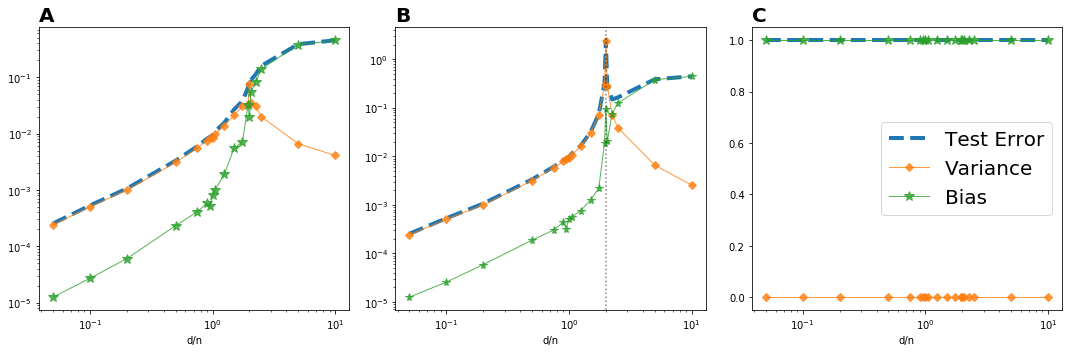

In [111]:
plt.figure(figsize=[15, 5])
for j, d in enumerate(ds):
    plt.subplot(1, 3, 1)
    plt.loglog(gammas, mse_test.mean(0)[j, :], label='Test Error', linestyle='--', linewidth=4.)
    plt.loglog(gammas, t_pred_variance[j, :], label='Variance', linestyle='-', linewidth=1, marker='D', markersize=5, alpha=.8)
    plt.loglog(gammas, t_pred_bias[j, :], label='Bias', linestyle='-', linewidth=1, marker='*', markersize=10, alpha=.8)
    plt.title('A', fontweight='bold', loc='left', fontsize=20)
#     plt.title("Ridge Regression", fontsize=20)
    plt.xlabel('d/n')
    
    plt.subplot(1, 3, 2)
    plt.loglog(gammas, ols_test.mean(0)[j, :], label='Test Error', linestyle='--', linewidth=4.)
    plt.loglog(gammas, ols_pred_variance[j, :], label='Variance', linestyle='-', linewidth=1, marker='D', markersize=5, alpha=.8)
    plt.loglog(gammas, ols_pred_bias[j, :], label='Bias', linestyle='-', linewidth=1, marker='*', markersize=8, alpha=.8)
    plt.axvline(2., color='k', linestyle=':', alpha=0.5)
    plt.title('B', fontweight='bold', loc='left', fontsize=20)
#     plt.title("Min. Norm OLS", fontsize=20)
    plt.xlabel('d/n')
#     plt.legend()

    plt.subplot(1, 3, 3)
    plt.semilogx(gammas, npl.norm(beta_star)*np.ones_like(gammas), label='Test Error', linestyle='--', linewidth=4.)
    plt.semilogx(gammas, np.zeros_like(gammas), label='Variance', linestyle='-', linewidth=1, marker='D', markersize=5, alpha=.8)
    plt.semilogx(gammas, npl.norm(beta_star)*np.ones_like(gammas), label='Bias', linestyle='-', linewidth=1, marker='*', markersize=10, alpha=.8)
    plt.title('C', fontweight='bold', loc='left', fontsize=20)
#     plt.title("The Zero-estimator",  fontsize=20)
    plt.xlabel('d/n')
    plt.legend()
plt.tight_layout()
# plt.savefig(prefix+'bias_variance.pdf')
plt.show()


## save results

In [119]:
file_name = prefix+'bias_variance.txt'

results = {'ns': ns, 'ds': ds, 'gammas': gammas, 'num_trials': num_trials, 'beta_norm': npl.norm(beta_star),  
           'mse_test': mse_test, 't_pred_variance': t_pred_variance, 't_pred_bias':t_pred_bias,
           'ols_test': ols_test, 'ols_pred_variance': ols_pred_variance, 'ols_pred_bias':ols_pred_bias,
           
           'mse': mse_beta, 't_variance': t_variance, 't_bias':t_bias,
           'ols_mse': ols_mse_beta, 'ols_variance': ols_variance, 'ols_bias':ols_bias,
          }
#     'mdl_practice': mdl_practice, 'mdl_theory_lam': mdl_theory_lam, 'mdl_theory':mdl_theory,  'mdl_theory_mean': mdl_theory_mean}
file = open(file_name, 'wb')
pickle.dump(results, file)
file.close()